In [3]:
#Matplotlib Homework

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
Mouse_metadata = "data/Mouse_metadata.csv"
Study_results = "data/Study_results.csv"

#05-Matplotlib_Homework_Pymaceuticals_data_Mouse_metadata.csv

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(Mouse_metadata)
study_results_df = pd.read_csv(Study_results)
mouse_metadata_df
study_results_df





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset

mouse_results_df = mouse_metadata_df.merge(study_results_df, on='Mouse ID')


# Display the data table for preview

mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


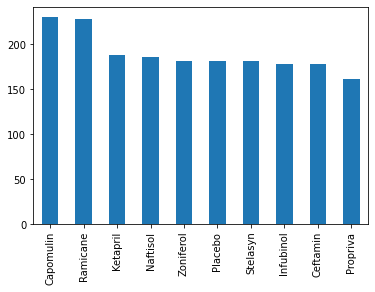

In [5]:
# Bar and Pie Charts
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_results_df["Drug Regimen"].value_counts().plot(kind="bar")


    








In [6]:
 # Checking the number of mice.
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_count = mouse_results_df["Mouse ID"].count
mouse_count

# Optional: Get all the data for the duplicate mouse ID. 
    
duplicate_rows = mouse_results_df[mouse_results_df.duplicated(['Mouse ID', 'Timepoint'])]
list_of_duplicate_rows = list(duplicate_rows.index)

# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_results_df.drop(list_of_duplicate_rows)
clean_df

# # # Checking the number of mice in the clean DataFrame.
# clean_df = mouse_results_df["Mouse ID"].count()  
# clean_df




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
 #Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, 
                           "Median": median, 
                           "Variance": variance, 
                           "Standard Deviation": standard_dv, 
                           "SEM": sem})
summary_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:


# Using the aggregation method, produce the same summary statistics in a single line

mouse_results_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"] 




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
mouse_drug_counts = mouse_results_df["Drug Regimen"].value_counts()
mouse_drug_counts.values


array([230, 228, 188, 186, 182, 181, 181, 178, 178, 161], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

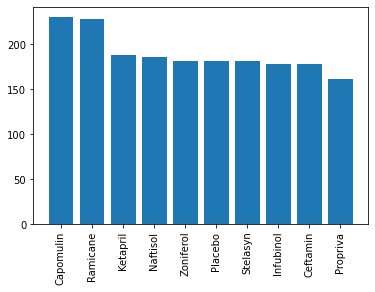

In [10]:
 # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(x=mouse_drug_counts.index, height=mouse_drug_counts.values)
plt.xticks(rotation=90)

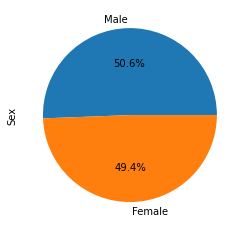

In [11]:
 # Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_results_df["Sex"].value_counts().plot(kind="pie",autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x1d887870d60>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

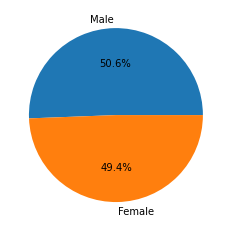

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_results_df["Sex"].value_counts(),autopct="%1.1f%%",labels = mouse_results_df["Sex"].value_counts().index )



In [13]:
 #Quartiles, Outliers and Boxplots
 # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# # Start by getting the last (greatest) timepoint for each mouse
max_tumor_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tumor_df = max_tumor_df.merge(clean_df, on=["Mouse ID", "Timepoint"])
merged_tumor_df





    

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments_that_will_be_plotted = ["Infubinol", "Placebo", "Ceftamin" ]
treatments_that_will_be_plotted = ["Infubinol", "Placebo", "Ceftamin" ]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


for treatment in treatments_that_will_be_plotted:
       #tumor_vol_data.append(clean_df[clean_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"].values)
        tumor_vol_data.append(list(merged_tumor_df.loc[merged_tumor_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']))
    
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vol_data   
    
# add subset 
# Determine outliers using upper and lower bounds
    


[[67.97341878,
  65.52574285,
  57.03186187,
  66.08306589,
  72.2267309,
  36.321345799999996,
  60.96971133,
  62.43540402,
  60.91876652,
  67.28962147,
  66.19691151,
  62.11727887,
  47.01036401,
  60.16518046,
  55.62942846,
  45.69933088,
  54.65654872,
  55.65068132,
  46.25011212,
  54.04860769,
  51.54243058,
  50.00513807,
  58.26844248,
  67.68556862,
  62.75445141],
 [70.71762058,
  72.25596306,
  65.81516535,
  69.04284082,
  69.82314577,
  73.21293851,
  47.52063206,
  53.30318455,
  52.94290169,
  45.0,
  58.01114583,
  62.03059364,
  73.05945435,
  53.71315792,
  66.09647477,
  50.21860469,
  64.11914213,
  49.00012468,
  63.42369517,
  56.52795159,
  50.64903842,
  52.61468889,
  68.13428817,
  58.63497149,
  66.84263453],
 [62.99935619,
  45.0,
  56.05774909,
  55.74282869,
  48.72207785,
  47.784681799999994,
  61.84902336,
  68.92318457,
  67.74866174,
  57.91838132,
  46.78453491,
  59.85195552,
  64.29983003,
  59.74190064,
  61.43389223,
  64.19234114,
  45.0,
 

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8878c9790>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8878c9e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8878c9430>,
 'medians': [<matplotlib.lines.Line2D at 0x1d8878d8550>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d8878d8850>,
 'means': []}

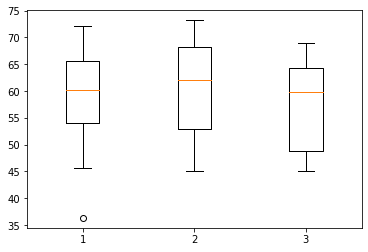

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 
plt.boxplot(tumor_vol_data)


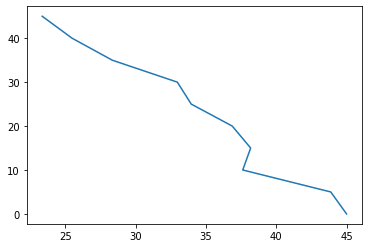

In [16]:
mouse_s185_df = clean_df[clean_df["Mouse ID"]=="s185"].reset_index()
 
# #Line and Scatter Plots
# # Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = mouse_s185_df['Tumor Volume (mm3)']
y_values = mouse_s185_df['Timepoint']

plt.plot(x_values, y_values)


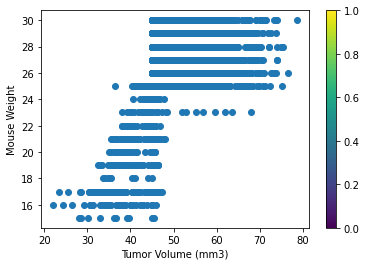

In [19]:
plt.scatter(clean_df['Tumor Volume (mm3)'],clean_df['Weight (g)'])
x_values = clean_df['Tumor Volume (mm3)'] 
y_values = clean_df['Weight (g)']
clb = plt.colorbar()
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight")

plt.show()


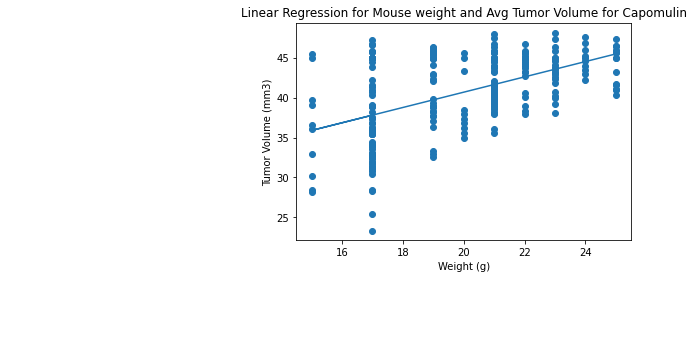

In [18]:
 #Correlation and Regression
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#find the linear regression

capomulin_df = clean_df[clean_df["Drug Regimen"]=="Capomulin"].reset_index()

x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "X = " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values)
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel ('Tumor Volume (mm3)')
plt.title ('Linear Regression for Mouse weight and Avg Tumor Volume for Capomulin')
plt.show()
  